In [1]:
import torch
import torchvision


class ToTensor:
    # 定义一个将原数据转为 Torch 的操作
    def __call__(self, X):
        return torch.from_numpy(X)


class MulTransform:
    # 定义一个将所有数据翻倍的预处理操作
    def __call__(self, X):
        X *= 2
        return X


# 定义预处理集合器
composed = torchvision.transforms.Compose([ToTensor(), MulTransform()])
composed

ModuleNotFoundError: No module named 'torchvision'

In [2]:
import numpy as np
data = np.array([1, 2, 3])
composed(data)

tensor([2, 4, 6], dtype=torch.int32)

In [7]:
#葡萄酒数据的预处理
from torch.utils.data import Dataset
import pandas as pd


class WineDataset(Dataset):
    # 建立一个数据集合继承  Dataset 即可
    def __init__(self, transform):
        # I初始化数据
        # 以pandas的形式读入数据
        xy = pd.read_csv(
            "./data/wine.csv", header=None)
        self.n_samples = xy.shape[0]

        # 这里我们就不做Tensor的转换了，将其全部放入 transform 中
        self.x_data = xy.values[:, 1:]
        self.y_data = xy.values[:, 0].reshape(-1,1)
        # 数据预处理集合
        self.transform = transform

    # 返回 dataset[index]
    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)

        return sample
    # 返回数据长度

    def __len__(self):
        return self.n_samples
    
#定义数据的归一化操作，这里使用最大最小归一化：
class Normalization:
    def __call__(self, sample):
        inputs, targets = sample
        amin, amax = inputs.min(), inputs.max()  # 求最大最小值
        inputs = (inputs-amin)/(amax-amin)  # (矩阵元素-最小值)/(最大值-最小值)
        return inputs, targets
    
#定义数据的转化操作，即将原数据类型转为 Tensor ：
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

In [11]:
# 归一化操作测试代码
a = 10*np.random.random((5, 5))
# 测试数据 前4列表示特征，最后一列表示标签
data = [a[:, 0:4], a[:, 4]]
Normalization()(data)

(array([[0.50772772, 0.03768292, 0.42190641, 0.86145322],
        [1.        , 0.66928777, 0.98237257, 0.        ],
        [0.19800921, 0.51590117, 0.69879442, 0.14633522],
        [0.65867533, 0.44934201, 0.08008179, 0.02791705],
        [0.65004075, 0.2284045 , 0.79050738, 0.4024312 ]]),
 array([7.69055344, 5.80170657, 6.41102868, 5.35247832, 4.87342254]))

In [15]:
# 数据的转化操作测试代码
a = 10*np.random.random((5, 5))
# 测试数据 前4列表示特征，最后一列表示标签
data = [a[:, 0:4], a[:, 4]]
ToTensor()(data)

(tensor([[1.8909, 9.8061, 5.6228, 9.2936],
         [1.7790, 3.1948, 9.7076, 3.8954],
         [7.1685, 8.5802, 1.6914, 0.1032],
         [3.9755, 5.3429, 6.2793, 5.7750],
         [8.1324, 8.3212, 1.1333, 5.5566]], dtype=torch.float64),
 tensor([5.6997, 0.3411, 7.7353, 2.6605, 8.8121], dtype=torch.float64))

In [19]:
# 处理葡萄酒数据
#定义 composed
composed = torchvision.transforms.Compose([Normalization(), ToTensor()])
# 传入该参数，即可获得一系列预处理之后的数据
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
# 输出类型观察数据是否发生改变
print(type(features), type(labels))
# 输出内容观察数据是否进行了归一
print(features, labels)

<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.3102e-02, 1.3431e-03, 2.0193e-03, 1.4389e-02, 1.1902e-01, 2.3668e-03,
        2.6110e-03, 0.0000e+00, 1.8878e-03, 5.0342e-03, 7.1380e-04, 3.4187e-03,
        1.0000e+00], dtype=torch.float64) tensor([1.], dtype=torch.float64)


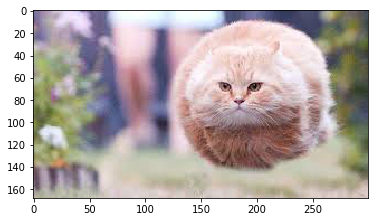

In [21]:
#图像数据预处理
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
img = Image.open("./data/cat.jpg")
imshow(img)

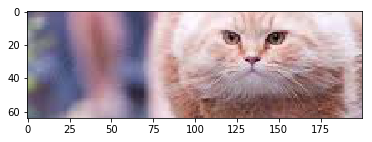

In [22]:
# torchvision.transforms.CenterCrop（size）：从中心开始，裁剪给定大小的 PIL 图像
transform = transforms.CenterCrop((64, 200))
new_img = transform(img)
imshow(new_img)

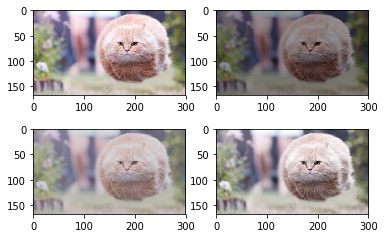

In [31]:
# transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)：
# 改变图片的亮度、对比度和饱和度
plt.subplot(221)
imshow(img)
# r随机改变亮度
my_img1 = transforms.ColorJitter((0.5, 0.6))(img)
plt.subplot(222)
imshow(my_img1)
# 随机改变对比度
my_img2 = transforms.ColorJitter(0, (0.5, 0.6))(img)
plt.subplot(223)
imshow(my_img2)
# 随机改变饱和度
my_img3 = transforms.ColorJitter(0, 0, (0.5, 0.6))(img)
plt.subplot(224)
imshow(my_img3)
plt.show()

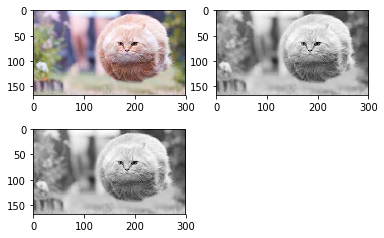

In [32]:
plt.subplot(2, 2, 1)
imshow(img)
my_img1 = transforms.Grayscale(1)(img)
plt.subplot(222)
imshow(my_img1, 'gray')
my_img2 = transforms.Grayscale(3)(img)
plt.subplot(223)
imshow(my_img2)

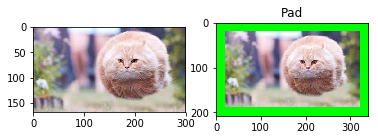

In [35]:
# transforms.Pad（padding，fill = 0，padding_mode ='constant' ）：
# 使用给定的 pad 值将给定的 PIL 图像四处填充
plt.subplot(121)
imshow(img)
# 四周加边界
my_img = transforms.Pad(padding=20, fill=(0, 255, 0),
                        padding_mode='constant')(img)
plt.subplot(122).set_title("Pad")
imshow(my_img)

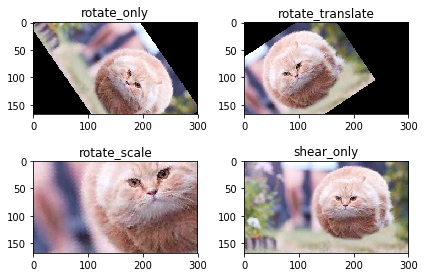

In [36]:
# transforms.RandomAffine(degrees, translate=None, scale=None,
#                       shear=None, resample=False, fillcolor=0)：
# 保持图像中心不变的中心仿射变换(可以理解为不同程度的旋转，再在空余位置补 0)
my_img1 = transforms.RandomAffine(60)(img)
plt.subplot(221).set_title("rotate_only")
imshow(my_img1)
my_img2 = transforms.RandomAffine(60, translate=(0.3, 0.3))(img)
plt.subplot(222).set_title("rotate_translate")
imshow(my_img2)
my_img3 = transforms.RandomAffine(60, scale=(2.0, 2.1))(img)
plt.subplot(223).set_title("rotate_scale")
imshow(my_img3)
my_img4 = transforms.RandomAffine(0, shear=60)(img)
plt.subplot(224).set_title("shear_only")
imshow(my_img4)
plt.tight_layout()

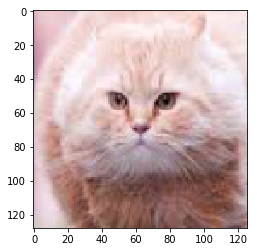

In [43]:
#torchvision.transforms.RandomResizedCrop(size, scale,ratio,interpolation)
new_img = transforms.RandomResizedCrop((128, 126), scale=(0.08, 1.0),
                                       ratio=(0.75, 1.333333333), interpolation=2)(img)
imshow(new_img)

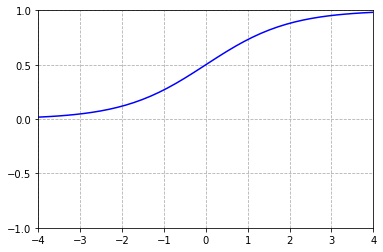

tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])


In [53]:
#Sigmoid函数
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

# 手写 sigmoid 函数
def sigmoid(x): return 1 / (1 + np.exp(-x))
#def sigmoid(x): return np.sin(x)

# 画图
y = np.linspace(-10, 10, 100)
plt.plot(y, sigmoid(y), 'b')
plt.grid(linestyle='--')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-1,-0.5,0, 0.5, 1])
plt.ylim(-1, 1)
plt.xlim(-4, 4)
plt.show()

# pytorch 中有两种实现方法
x = torch.tensor([-1.0, 1.0, 2.0, 3.0])
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

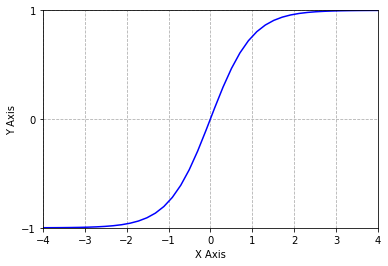

tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])


In [54]:
#Tanh函数
import torch
import torch.nn as nn
import torch.nn.functional as F

def tanh(x): return 2*sigmoid(2*x)-1


y = np.linspace(-10, 10, 100)
plt.plot(y, tanh(y), 'b')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-1, 0, 1])
plt.ylim(-1, 1)
plt.xlim(-4, 4)
plt.show()

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

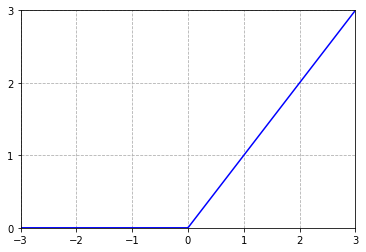

tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])


In [55]:
#Relu函数
import torch
import torch.nn as nn
import torch.nn.functional as F

def relu(x): return np.where(x >= 0, x, 0)


y = np.linspace(-10, 10, 1000)
plt.plot(y, relu(y), 'b')
plt.grid(linestyle='--')

plt.xticks([-3, -2, -1, 0, 1, 2, 3])
plt.yticks([0, 1, 2, 3])
plt.ylim(0, 3)
plt.xlim(-3, 3)
plt.show()

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)
